# GOBSY REAL ESTATE PRICE PREDICTOR

In [1]:
import pandas as pd

In [2]:
Housing_Data = pd.read_csv("Housing_Data.csv")

In [3]:
Housing_Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df= pd.DataFrame(Housing_Data)

In [5]:
df.info() #AS THE DATA CONTAINS ONLY 506 ENTRIES IT IS CONSIDERED AS SUPER SHORT DATA FROM THE ML STANDARDS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       501 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.columns = df.columns.str.replace(' ', '')

In [7]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286627,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704773,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#percentile indicates the value below which the given percentage value lies EG:25% values of CRIM lies below 0.08245

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CF8DBB448>,
      dtype=object)

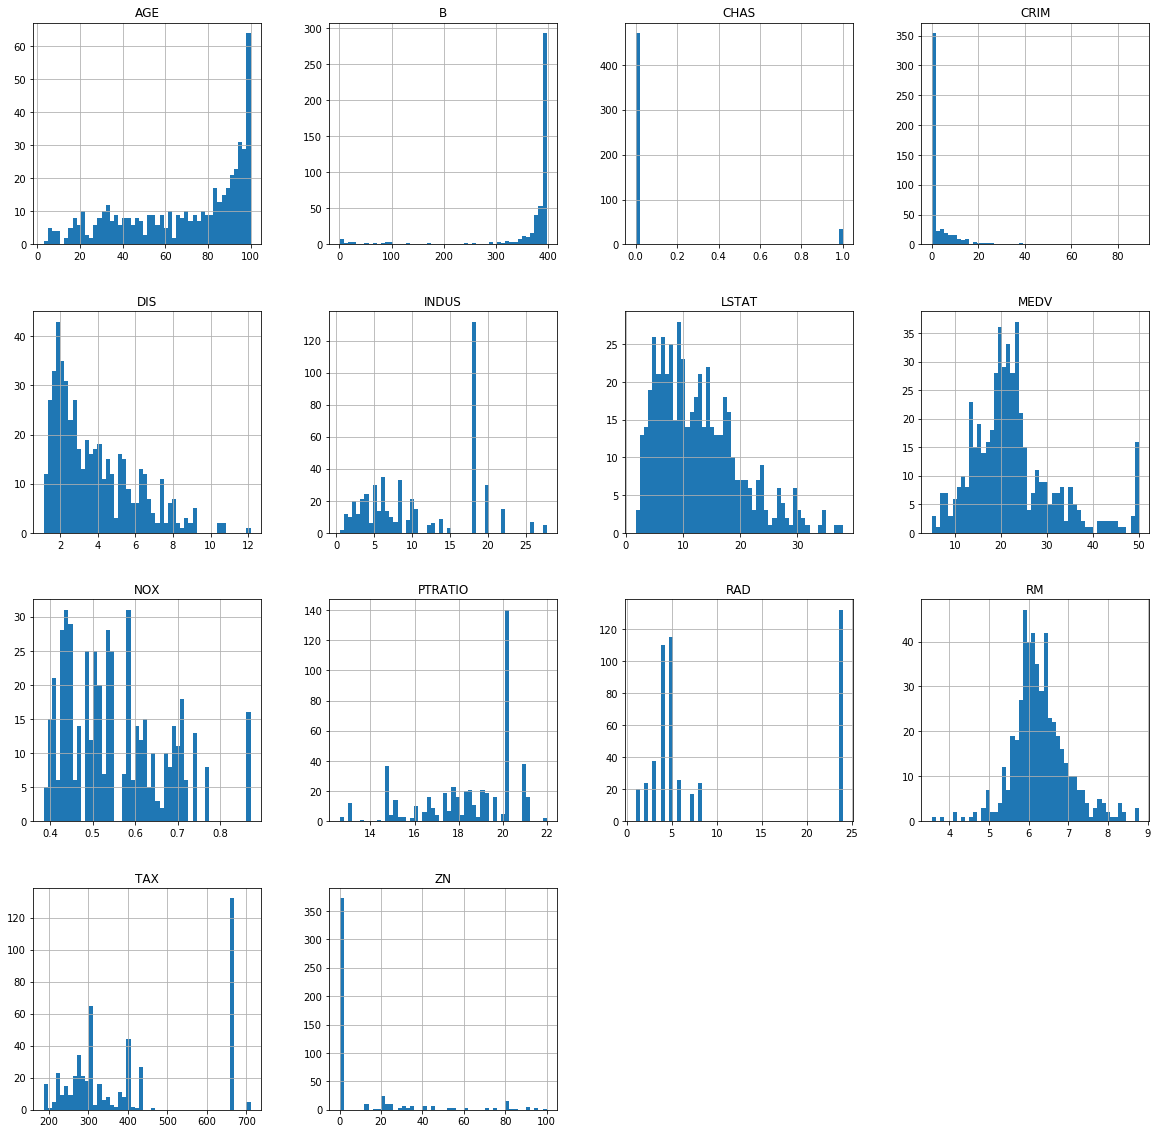

In [12]:
df.hist(bins=50,figsize=(20,20))

###### TRAIN TEST SPLITTING

##### THE PERFECT RATIO FOR TRAINING AND TESTING A DATA SET IS 80:20

In [13]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled = np.random.permutation(len(data)) #IT IS A FUNCTION TO SHUFFLE THE ENTTIRE DATA
    np.random.seed(42) #to fix the shuffled data
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size] #THE DATA TILL TEST-SET-SIZE
    train_indices = shuffled[test_set_size:] #THE COMPLETE DATA AFTER TEST SET SIZE
    return data.iloc[train_indices],data.iloc[test_indices]

In [14]:
train,test= split_train_test(df,0.2)

In [15]:
print(f"ROWS IN TRAIN SET:{len(train)}")
print(f"ROWS IN TEST SET:{len(test)}")

ROWS IN TRAIN SET:405
ROWS IN TEST SET:101


In [16]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42) #IT IS THE SAME THING WHICH WE HAVE DONE ABOVE

In [17]:
print(f"ROWS IN TRAIN SET:{len(train_set)}")
print(f"ROWS IN TEST SET:{len(test_set)}")

ROWS IN TRAIN SET:404
ROWS IN TEST SET:102


HERE IT BECOMES NECESSARY FOR US TO ENSURE THAT OUR MODEL GO THROUGH EACH AREA OF THE DATA INSTEAD OF JUST GOING THROUGH THE ONE PART LET'S SAY OUR ALL THE ONES IN CHAS WENT TO TESTING AND THERE ARE ONLY ZEROS IN TRAINING THEN WE WONT BE ABLE TO GET A GOOD MODEL HENCE IT BECOMES NECESSARY FOR US TO GO THROUGH THE STRATIFIED SAMPLING

THE CHAS WAS A VERY IMPORTANT VARIABLE FOR PREDICTION OF PRICE HENCE IT BECOMES IMPORTANT TO STRATIFY IT!!

In [18]:
#STRATIFIED SAMPLING
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
    strat_test_set = df.loc[test_index]
    strat_train_set = df.loc[train_index]

In [19]:
print(strat_test_set['CHAS'].value_counts())
print(f"\n\nTHE RATIO OF DIVIDING 0 AND 1 IS:{95/7}")


0    95
1     7
Name: CHAS, dtype: int64


THE RATIO OF DIVIDING 0 AND 1 IS:13.571428571428571


In [20]:
print(strat_train_set['CHAS'].value_counts())
print(f"\n\nTHE RATIO OF DIVIDING 0 AND 1 IS:{376/28}")

0    376
1     28
Name: CHAS, dtype: int64


THE RATIO OF DIVIDING 0 AND 1 IS:13.428571428571429


In [21]:
housing = pd.DataFrame(strat_train_set)

# Looking For Correlations

In [22]:
corr_matrix = housing.corr()
#CORRELATION GIVES THE RELATIONSHIP BETWEEN TWO VARIABLES MEANS IT GIVES THE IMPACT OF ONE VARIABLE ON ANOTHER

In [23]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678852
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
from pandas.plotting import scatter_matrix

HERE WE WILL PLOT ONLY THOSE GRAPH WHICH HAVE STRONG RELATIONSHIPS EITHER POSITIVE OR NEGATIVE


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CFD4CA248>,
      dtype=object)

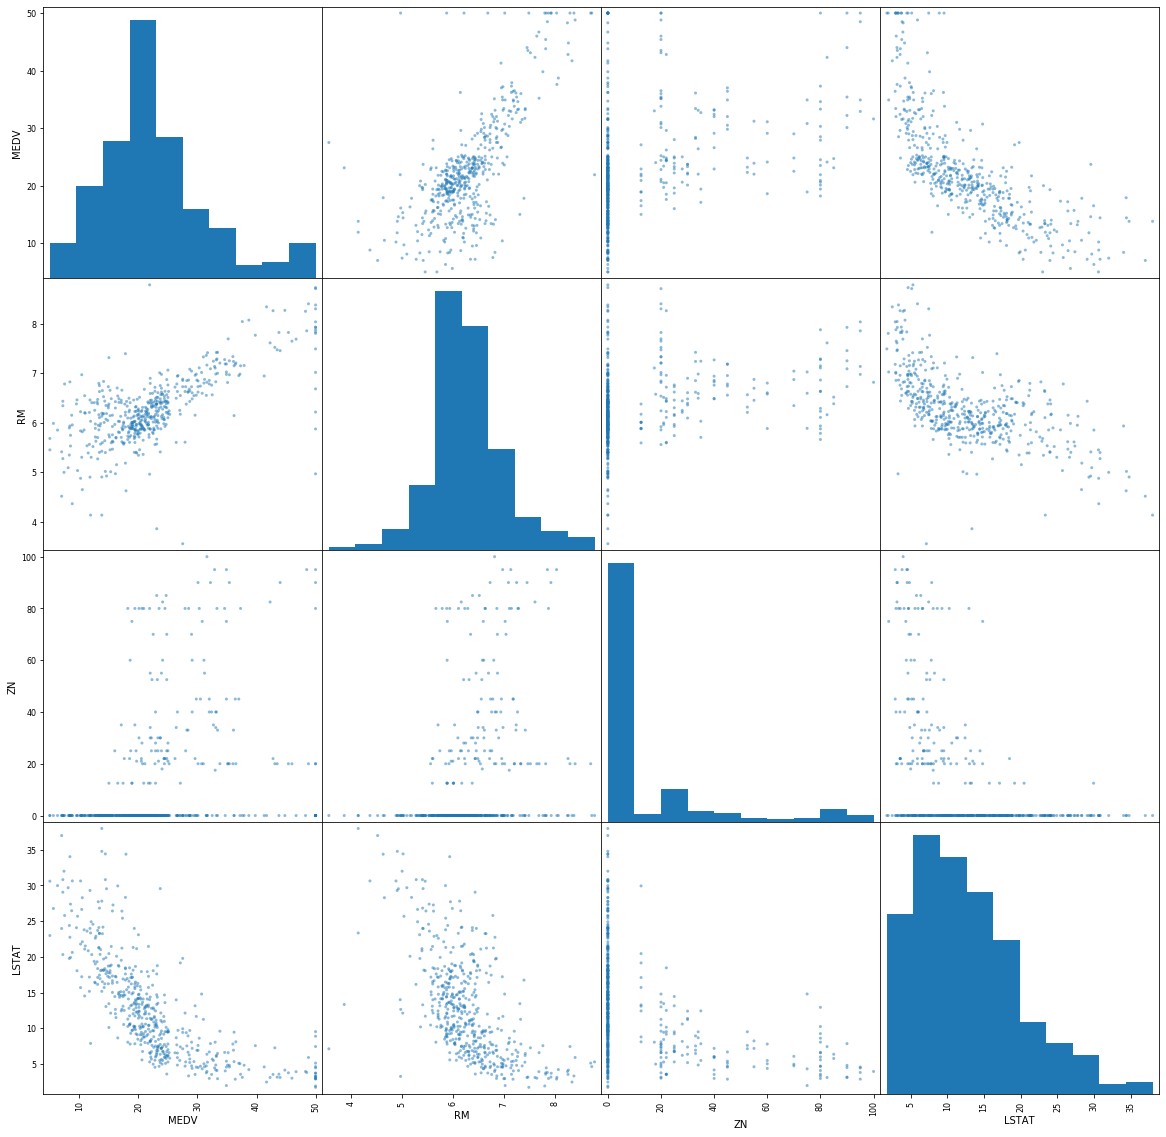

In [25]:
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(df[attributes],figsize=(20,20))

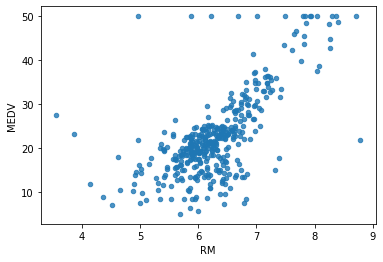

In [26]:
housing.plot(kind='scatter',y='MEDV',x='RM',alpha=0.8)
#HERE WE CAN ALSO REMOVE OUTLIERS WHICH WE CAN CLEARLY SEE

### Trying Out Attribute Combinations

HERE WE WILL TRY TO MAKE A NEW ATTRIBUTE IN ORDER TO TRYING OUT ATTRIBUTE COMBINATIONS 

TAX PER ROOM MEANS THE TOTAL TAX PER ROOM

In [27]:
housing['TAXRM'] = housing['TAX']/df['RM']

In [28]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [29]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678852
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528513
LSTAT     -0.740494
Name: MEDV, dtype: float64

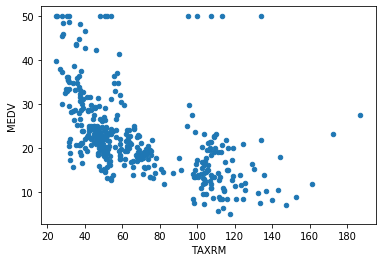

In [30]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",)

In [31]:
housing = strat_train_set.drop('MEDV',axis=1)

In [32]:
housing_label = strat_train_set['MEDV']

# MISSING ATTRIBUTES



THERE ARE CERTAIN WAYS TO TAKE CARE OF MISSING ATTRIBUTES
1.) GET RID OF MISSING DATA POINTS
2.) GET RID OF WHOLE ATTRIBUTE
3.) SET THE VALUE TO SOME VALUE (0,MEAN or MEDIAN)

In [33]:
housing.info() #HERE WE CAN CLEARLY SEE THE MISSING ROOM VALUES

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  TAXRM    400 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 67.3 KB


In [34]:
#LETS APPLY THE OPTION 1 AND REMOVE ALL THE EMPTY CELLS
a = housing.dropna(subset=['RM'])
a.shape

(400, 14)

In [35]:
#FURTHER LETS APPLY THE OPTION 2 AND REMOVE THE ENTIRE RM COLUMN
housing.drop("RM",axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02,65.507152
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29,109.126659
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57,35.294118
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13,102.068966


In [36]:
#option 3 --> HERE WE WILL REPLACE THE MEDIAN OF THE DATA TO ALL THE BLANK COLUMNS
median = housing['RM'].median()
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
housing.shape

(404, 14)

# IMPUTER

SKLEARN ALREADY HAD THE CLASS TO PERFORM THE TASKS WHICH WE HAVE DONE PREVIOUSLY MANUALLY


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [39]:
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [40]:
imputer.statistics_ #IT HAVE CALCULATED MEDIAN FOR ALL THE COLUMNS

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21350000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 5.44293624e+01])

In [41]:
X = imputer.transform(housing)

In [42]:
housing_tr = pd.DataFrame(X,columns = housing.columns)

In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281208,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.568773
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711434,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.396586
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,54.429362
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


# Scikit Learn Design

Primarily we have three types of objects

1.)Estimators -> It estimates some parameter based on a dataset eg: imputer (it replaced median where values where nan)
It has TWO Methods:
FIT METHOD: Fits the Dataset and calculate internal Parameters. 
Transform Method : Transform Method Takes input and return output based on the learnings from fit.

2.)Transformers --> Transform Method Takes input and return output based on the learnings from fit. It also have a convenience function called fit_transform which fits and then transform.

3.)Predictors --> Linear Regression is an example of predictor. fit() and predict() are two examples of common function and it also gives score() function which will evaluate our predictions.

# Feature Scaling

TWO TYPES OF FEATURE SCALING METHOD PRIMARILY:-

1.) min-max scaling (Normalization)
(value-min)/(max-min) THE VALUE WILL COME TO ONE SCALE [0 to 1 range]
sklearn provides a class called minmaxscaler for it

2.) Standardization
(value-mean)/SD
sklearn provides a class called standard scaler for it

# Creating a Pipeline

Pipelines are meant to automate the certain repetitative tasks

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('Std_Scaler',StandardScaler())    
])

In [46]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [86]:
housing_num_tr.shape


(404, 14)

# Selecting a Desired Model for Dragon Real Estate

In [48]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(housing_num_tr,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]

In [50]:
prepared_data = my_pipeline.transform(some_data)

In [51]:
model1.predict(prepared_data)

array([22.53006287, 26.85569361, 18.90472247, 24.93037335, 24.07472361])

In [52]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [53]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Model

In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions = model1.predict(housing_num_tr)
mse = mean_squared_error(housing_label,housing_predictions)
rmse1 = np.sqrt(mse)
print(rmse1)


4.254157534577149


### Using Better Evaluation Technique CROSS VALIDATION

In [55]:
from sklearn.model_selection import cross_val_score
scores_LR = cross_val_score(model1,housing_num_tr,housing_label,scoring = "neg_mean_squared_error",cv=10)
rmse_scores_LR = np.sqrt(-scores_LR)

In [56]:
rmse_scores_LR

array([3.09737137, 3.2793901 , 4.31901197, 3.87279699, 5.17318242,
       3.56771981, 7.43591089, 4.2708774 , 3.47175505, 5.06649107])

In [59]:
Print_Scores(rmse_scores_LR)

Scores: [3.09737137 3.2793901  4.31901197 3.87279699 5.17318242 3.56771981
 7.43591089 4.2708774  3.47175505 5.06649107]
Mean: 4.355450704694848
Standard Deviation: 1.2266638313291625


## Let's Try a New Model

In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_label,housing_predictions)
rmse = np.sqrt(mse)
print(rmse)


0.0


In [62]:
from sklearn.model_selection import cross_val_score
scores_DR = cross_val_score(model,housing_num_tr,housing_label,scoring = "neg_mean_squared_error",cv=10)
rmse_scores_DR = np.sqrt(-scores_DR)

In [63]:
rmse_scores_DR

array([3.78556308, 4.73515653, 4.87829938, 4.05787401, 3.73821481,
       3.19632602, 4.57971069, 5.06838238, 3.49631949, 4.46329475])

#### DECISION TREE OUTPERFORMS THE LINEAR REGRESSION HENCE it is a Good Option

In [64]:
def Print_Scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())
    

In [65]:
Print_Scores(rmse_scores_DR)

Scores: [3.78556308 4.73515653 4.87829938 4.05787401 3.73821481 3.19632602
 4.57971069 5.06838238 3.49631949 4.46329475]
Mean: 4.199914113861583
Standard Deviation: 0.6018144087073191


## Let's Try a New Model

In [66]:
from sklearn.ensemble import RandomForestRegressor


In [67]:
model3 = RandomForestRegressor()
model3.fit(housing_num_tr,housing_label)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
predicted_value = model3.predict(housing_num_tr)
mse_RF = mean_squared_error(predicted_value,housing_label)
rmse_RF = np.sqrt(mse_RF)

In [69]:
rmse_RF

1.3087886291309887

In [70]:
from sklearn.model_selection import cross_val_score
scores_RF = cross_val_score(model3,housing_num_tr,housing_label,scoring = "neg_mean_squared_error",cv=10)
rmse_scores_RF = np.sqrt(-scores_DR)

In [71]:
Print_Scores(rmse_scores_RF)

Scores: [3.78556308 4.73515653 4.87829938 4.05787401 3.73821481 3.19632602
 4.57971069 5.06838238 3.49631949 4.46329475]
Mean: 4.199914113861583
Standard Deviation: 0.6018144087073191


# Saving the Model

In [72]:
from joblib import dump,load
dump(model3,'Dragon.joblib')

['Dragon.joblib']

# Testing the Model with our Test Data set

In [102]:
X_test = strat_test_set.drop('MEDV',axis=1)

In [103]:
X_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.305406,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.665977,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000
25%,0.057828,0.000000,4.950000,0.000000,0.448000,5.905000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.540000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000


In [104]:
Y_test = strat_test_set['MEDV'].copy()

In [107]:
X_test_prepared = my_pipeline.fit_transform(strat_test_set)

In [108]:
final_prediction = model3.predict(X_test_prepared)
mse = mean_squared_error(final_prediction,Y_test)
rmse = np.sqrt(mse)
print(rmse)

3.611511763193673


In [93]:
print(f"{final_prediction}\n{list(Y_test)}")

[24.391 10.598 25.114 20.837 17.358 14.874 19.435 15.7   32.058 40.358
 18.995 10.035 24.459 28.211 20.332 13.527 32.993 14.391 23.297 16.844
 19.686 15.037 19.794 21.621 17.981 30.712 16.769 32.001 10.593 34.139
 21.082 20.539 22.345  9.985 20.293 13.349 42.358 23.185 23.927 43.303
 22.588 26.625 19.742 21.516 15.346 33.561 44.359 20.865 17.47  22.008
 21.43  14.742 19.416 15.313 24.266 34.557 41.262 28.081 17.706 20.941
 45.966 11.848 19.483 22.235 15.243 38.641 19.304 16.443 17.885 33.734
 26.335 22.792 19.832 22.667 35.93  14.22  15.598 20.4   21.581 21.472
 21.96  23.149 14.706 22.638 20.299 21.304 14.784 20.825 21.776 23.659
 17.964 27.15  10.057 24.37  16.085 30.112 20.414 32.127 14.2   25.159
 18.173 17.078]
[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [110]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24376509, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034, -0.51014778])